# Figure 1

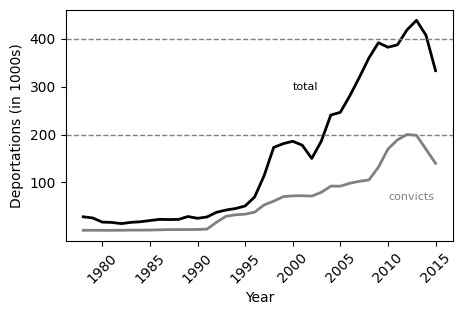

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
dep_tot = pd.read_csv(r"../dat/data_USdeporttotal.csv")

# Create figure and plot
plt.figure(figsize=(5, 3))  # Size in inches
plt.plot(dep_tot['YEAR'], dep_tot['TOTAL'], color='black', linewidth=2, label='Total')
plt.plot(dep_tot['YEAR'], dep_tot['CONVICT'], color='grey', linewidth=2, label='Convicts')

# Customizing the y-axis
plt.yticks([100000, 200000, 300000, 400000], ['100', '200', '300', '400'])

# Add horizontal lines
plt.axhline(y=200000, color='grey', linestyle='--', linewidth=1)
plt.axhline(y=400000, color='grey', linestyle='--', linewidth=1)

# Adding text
plt.text(2000, 300000, 'total', fontsize=8, verticalalignment='center')
plt.text(2010, 70000, 'convicts', color='grey', fontsize=8, verticalalignment='center')

# Labels and title
plt.ylabel('Deportations (in 1000s)')
plt.xlabel('Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better fit

# Remove x-axis labels (if that's desired, uncomment the following line)
# plt.gca().xaxis.set_ticklabels([])

# Saving the figure as EPS
plt.savefig('figure1.eps', format='eps')

# Show the plot
plt.show()


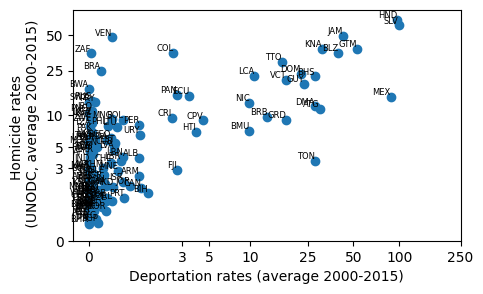

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
agg_mean_graph = pd.read_csv(r"../dat/data_figure2.csv")

# Calculating log-transformed values
agg_mean_graph['plot_y'] = np.log(agg_mean_graph['homrates_pc_unodc_mn'] + 1)
agg_mean_graph['plot_x'] = np.log(agg_mean_graph['deport_convict_mn'] + 1)

# Dropping NA values
PL = agg_mean_graph.dropna(subset=['plot_x', 'plot_y', 'iso3'])

# Define y and x tick labels
y_values = np.array([0, 3, 5, 10, 25, 50])
x_values = np.array([0, 3, 5, 10, 25, 50, 100, 250])

# Create plot
plt.figure(figsize=(5, 3))  # size in inches
plt.scatter(PL['plot_x'], PL['plot_y'])
plt.ylabel('Homicide rates \n (UNODC, average 2000-2015)')
plt.xlabel('Deportation rates (average 2000-2015)')

# Adjust y-axis and x-axis ticks and labels
plt.yticks(np.log(y_values + 1), labels=y_values)
plt.xticks(np.log(x_values + 1), labels=x_values)

# Optional: Add iso3 codes as text next to each point
for i, txt in enumerate(PL['iso3']):
    plt.text(PL['plot_x'].iloc[i], PL['plot_y'].iloc[i], txt, fontsize=6, ha='right', va='bottom')

# Save the figure as an EPS file
plt.savefig('figure2.eps', format='eps')

# Show the plot
plt.show()


# Table 1

In [58]:
import pandas as pd
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare

# Load data
data = pd.read_csv(r"../dat/data_replic.csv")
data['year'] = pd.to_datetime(data['year'], format='%Y')  # Ensure 'year' is treated as a datetime object if needed
data.set_index(['iso3', 'year'], inplace=True)  # Set multi-index for panel data

# Display first few rows of the data
print(data.head())

# Define control variables string for use in formulas
control_vars = " + war_intrastate + corruption + crime_US_weight + GDP_growth + pop_sh14 + GDPpercapita_const2010USD_log + gini_mkt + polity2 + population_log + remittances_GDP + yr_sch + urban_interp"

# (1) Convicts' deportation rates, no controls, only country and year fixed effects
mod1 = PanelOLS.from_formula('homrates_unodc ~ deport_convict + EntityEffects + TimeEffects', data)
res1 = mod1.fit(cov_type='clustered', cluster_entity=True)

# (2) Convicts' deportation rates, with time-varying controls and country fixed effects
mod2 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict + EntityEffects + TimeEffects {control_vars}', data)
res2 = mod2.fit(cov_type='clustered', cluster_entity=True)

# (3) Change in convicts' deportation rates, with time-varying controls and country fixed effects
mod3 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_d + EntityEffects + TimeEffects {control_vars}', data)
res3 = mod3.fit(cov_type='clustered', cluster_entity=True)

# (4) Change in convicts' deportation rates and change in non-convicts' deportation rate, with time-varying controls
mod4 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_d + deport_nonconvict_d + EntityEffects + TimeEffects {control_vars}', data)
res4 = mod4.fit(cov_type='clustered', cluster_entity=True)

# (5) Change in convicts' deportation rates and change in leading values of convicts' deportation rate, with controls
mod5 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_d + deport_convict_lead + EntityEffects + TimeEffects {control_vars}', data)
res5 = mod5.fit(cov_type='clustered', cluster_entity=True)

# Print summaries
print(res1.summary)
print(res2.summary)
print(res3.summary)
print(res4.summary)
print(res5.summary)


                                region         income_group  homrates_unodc  \
iso3 year                                                                     
AFG  2010-01-01             South Asia           Low income            3.81   
     2012-01-01             South Asia           Low income            5.41   
ALB  1996-01-01  Europe & Central Asia  Upper middle income             NaN   
     1998-01-01  Europe & Central Asia  Upper middle income             NaN   
     2000-01-01  Europe & Central Asia  Upper middle income             NaN   

                 homrates_who  deport_convict  deport_convict_d  \
iso3 year                                                         
AFG  2010-01-01           NaN        0.019392         -0.022943   
     2012-01-01           NaN        0.026549          0.005444   
ALB  1996-01-01      8.355268        0.141653          0.033120   
     1998-01-01     31.734250        0.159418          0.033957   
     2000-01-01     10.676825        0.33857

C:\Users\mccao\AppData\Roaming\Python\Python311\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
C:\Users\mccao\AppData\Roaming\Python\Python311\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
C:\Users\mccao\AppData\Roaming\Python\Python311\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
C:\Users\mccao\AppData\Roaming\Python\Python311\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__

                          PanelOLS Estimation Summary                           
Dep. Variable:         homrates_unodc   R-squared:                        0.1389
Estimator:                   PanelOLS   R-squared (Between):              0.2425
No. Observations:                 608   R-squared (Within):               0.1352
Date:                Fri, May 03 2024   R-squared (Overall):              0.2459
Time:                        19:31:12   Log-likelihood                   -1478.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      77.239
Entities:                         123   P-value                           0.0000
Avg Obs:                       4.9431   Distribution:                   F(1,479)
Min Obs:                       2.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             4.3084
                            

C:\Users\mccao\AppData\Roaming\Python\Python311\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


# Table 2

In [59]:
import pandas as pd
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare

# Load data
data = pd.read_csv(r"../dat/data_replic.csv")
data['year'] = pd.to_datetime(data['year'], format='%Y').dt.year  # Convert 'year' to integer if needed
data.set_index(['iso3', 'year'], inplace=True)  # Set multi-index for panel data

# Subset to Latin America and the Caribbean region
data_LAC = data[data['region'] == "Latin America & Caribbean"]

# Define control variables
control_vars = "corruption + crime_US_weight + GDP_growth + pop_sh14 + GDPpercapita_const2010USD_log + gini_mkt + polity2 + population_log + remittances_GDP + yr_sch + urban_interp"

# (1) Convicts' deportation rates, no controls, only country and year fixed effects
mod1 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict + EntityEffects + TimeEffects + {control_vars}', data_LAC)
res1 = mod1.fit(cov_type='clustered', cluster_entity=True)

# (2) Change in convicts' deportation rates, with time-varying controls and country fixed effects
mod2 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_d + EntityEffects + TimeEffects + {control_vars}', data_LAC)
res2 = mod2.fit(cov_type='clustered', cluster_entity=True)

# Assuming 'homrates_who' is another dependent variable
# Define a reduced set of controls for WHO data analysis
reduced_controls = "corruption + GDP_growth + pop_sh14 + GDPpercapita_const2010USD_log + gini_mkt + polity2 + population_log + remittances_GDP + yr_sch + urban_interp"

# (3) Deportation rates in levels using WHO data
mod3 = PanelOLS.from_formula(f'homrates_who ~ deport_convict + EntityEffects + TimeEffects + {reduced_controls}', data_LAC)
res3 = mod3.fit(cov_type='clustered', cluster_entity=True)

# (4) Changes in deportation rates using WHO data
mod4 = PanelOLS.from_formula(f'homrates_who ~ deport_convict_d + EntityEffects + TimeEffects + {reduced_controls}', data_LAC)
res4 = mod4.fit(cov_type='clustered', cluster_entity=True)

# Print model summaries
print(res1.summary)
print(res2.summary)
print(res3.summary)
print(res4.summary)


C:\Users\mccao\AppData\Roaming\Python\Python311\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
C:\Users\mccao\AppData\Roaming\Python\Python311\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
C:\Users\mccao\AppData\Roaming\Python\Python311\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
C:\Users\mccao\AppData\Roaming\Python\Python311\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__

                          PanelOLS Estimation Summary                           
Dep. Variable:         homrates_unodc   R-squared:                        0.4567
Estimator:                   PanelOLS   R-squared (Between):             -703.68
No. Observations:                  99   R-squared (Within):               0.0823
Date:                Fri, May 03 2024   R-squared (Overall):             -670.79
Time:                        19:31:13   Log-likelihood                   -273.72
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4.2736
Entities:                          21   P-value                           0.0001
Avg Obs:                       4.7143   Distribution:                   F(12,61)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             18.326
                            

# table 3

In [60]:
import pandas as pd
from linearmodels.iv import IV2SLS
from linearmodels.panel import PanelOLS

# Load and prepare data
data = pd.read_csv(r"../dat/data_replic.csv")
data['year'] = pd.to_datetime(data['year'], format='%Y')
data.set_index(['iso3', 'year'], inplace=True)

# prepping datasets
data_2stp = data.dropna(subset=['homrates_unodc', 'instr_enforce_everify_lag1', 'instr_benef_medicaidpregn_lag1', 'deport_convict'])
data_LAC = data[data['region'] == "Latin America & Caribbean"]
data_LAC2stp = data_LAC.dropna(subset=['homrates_unodc', 'instr_enforce_everify_lag1', 'instr_benef_medicaidpregn_lag1', 'deport_convict'])

control_vars = "corruption + crime_US_weight + GDP_growth + pop_sh14 + GDPpercapita_const2010USD_log + gini_mkt + polity2 + population_log + remittances_GDP + yr_sch + urban_interp"

instruments = "instr_enforce_everify_lag1 + instr_benef_medicaidpregn_lag1"

endog = "deport_convict"

dependent = "homrates_unodc"

In [61]:
# get 1st step tables for levels
mod1 = PanelOLS.from_formula(f'deport_convict ~ {instruments} + EntityEffects + TimeEffects + war_intrastate + {control_vars}', data_2stp)
res1 = mod1.fit(cov_type='robust')
print(res1.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:         deport_convict   R-squared:                        0.4345
Estimator:                   PanelOLS   R-squared (Between):             -1562.8
No. Observations:                 399   R-squared (Within):               0.3110
Date:                Fri, May 03 2024   R-squared (Overall):             -1234.3
Time:                        19:31:13   Log-likelihood                   -1320.5
Cov. Estimator:                Robust                                           
                                        F-statistic:                      16.407
Entities:                          81   P-value                           0.0000
Avg Obs:                       4.9259   Distribution:                  F(14,299)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             2.7472
                            

C:\Users\mccao\AppData\Roaming\Python\Python311\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [62]:
# get 2nd step for levels
data_2stp['deport_convict_hat'] = res1.predict()
mod2 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_hat + EntityEffects + TimeEffects + war_intrastate + {control_vars}', data_2stp)
res2 = mod2.fit(cov_type='robust')
print(res2.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:         homrates_unodc   R-squared:                        0.1890
Estimator:                   PanelOLS   R-squared (Between):             -2.0397
No. Observations:                 399   R-squared (Within):              -0.9588
Date:                Fri, May 03 2024   R-squared (Overall):             -1.8350
Time:                        19:31:13   Log-likelihood                   -938.35
Cov. Estimator:                Robust                                           
                                        F-statistic:                      5.3763
Entities:                          81   P-value                           0.0000
Avg Obs:                       4.9259   Distribution:                  F(13,300)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             1.7978
                            

C:\Users\mccao\AppData\Local\Temp\ipykernel_17580\3097214890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2stp['deport_convict_hat'] = res1.predict()
C:\Users\mccao\AppData\Roaming\Python\Python311\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [63]:
# get 1st step tables for LAC
mod3 = PanelOLS.from_formula(f'deport_convict ~ {instruments} + EntityEffects + TimeEffects + {control_vars}', data_LAC2stp)
res3 = mod3.fit(cov_type='robust')
print(res3.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:         deport_convict   R-squared:                        0.7958
Estimator:                   PanelOLS   R-squared (Between):             -4081.6
No. Observations:                  99   R-squared (Within):               0.0046
Date:                Fri, May 03 2024   R-squared (Overall):             -3100.0
Time:                        19:31:13   Log-likelihood                   -335.42
Cov. Estimator:                Robust                                           
                                        F-statistic:                      17.985
Entities:                          21   P-value                           0.0000
Avg Obs:                       4.7143   Distribution:                   F(13,60)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             13.734
                            

C:\Users\mccao\AppData\Roaming\Python\Python311\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [64]:
# get second step for LAC
data_LAC2stp['deport_convict_hat'] = res3.predict()
mod4 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_hat + EntityEffects + TimeEffects + {control_vars}', data_LAC2stp)
res4 = mod4.fit(cov_type='robust')
print(res4.summary)

C:\Users\mccao\AppData\Local\Temp\ipykernel_17580\2668661284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_LAC2stp['deport_convict_hat'] = res3.predict()


                          PanelOLS Estimation Summary                           
Dep. Variable:         homrates_unodc   R-squared:                        0.4161
Estimator:                   PanelOLS   R-squared (Between):             -11.979
No. Observations:                  99   R-squared (Within):              -2.0328
Date:                Fri, May 03 2024   R-squared (Overall):             -9.3646
Time:                        19:31:13   Log-likelihood                   -277.30
Cov. Estimator:                Robust                                           
                                        F-statistic:                      3.6221
Entities:                          21   P-value                           0.0004
Avg Obs:                       4.7143   Distribution:                   F(12,61)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             3.5423
                            

C:\Users\mccao\AppData\Roaming\Python\Python311\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
